# : - Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np


project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from sklearn.model_selection import train_test_split
from src.models.logistic_model import LogisticModel
from src.models.xgboost_model import XGBoostModel
from src.models.ensemble_model import RandomForestModel
from src.models.evaluator import Evaluator

# : - Load data

In [2]:
df_fraud = pd.read_csv("../../data/processed/cleaned_fraud_data.csv")

# : - Data preparation function

In [3]:
def prepare_data(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# : - Prepare datasets

#### --- for Fraud  ---

In [4]:
X_train_fd, X_test_fd, y_train_fd, y_test_fd = prepare_data(df_fraud, "class")

#   :::::::::: - Train and evaluate on Fraud dataset -  :::::::::: 

# --- LogisticModel fraud dataset ---


--- Evaluation: Logistic Regression ---
AUC-PR: 0.4522
F1 Score: 0.2682
Confusion Matrix:
[[26228 14861]
 [ 1286  2959]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.64      0.76     41089
           1       0.17      0.70      0.27      4245

    accuracy                           0.64     45334
   macro avg       0.56      0.67      0.52     45334
weighted avg       0.88      0.64      0.72     45334



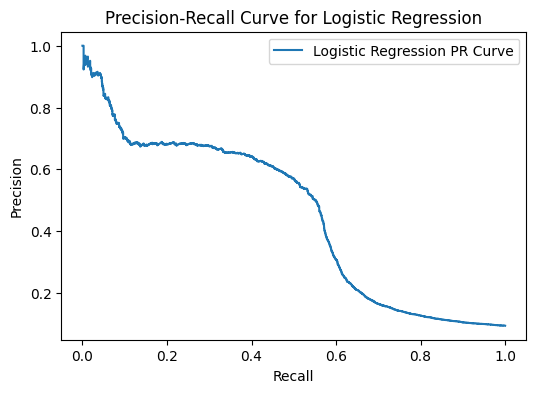

{'auc_pr': np.float64(0.45216502326225605),
 'f1': 0.26820756854747335,
 'confusion_matrix': array([[26228, 14861],
        [ 1286,  2959]])}

In [6]:
lr_fd = LogisticModel()
lr_fd.train(X_train_fd, y_train_fd)
Evaluator.evaluate(lr_fd, X_test_fd, y_test_fd)

# --- XGBoostModel fraud dataset ---


--- Evaluation: XGBoost ---
AUC-PR: 0.5967
F1 Score: 0.6699
Confusion Matrix:
[[40807   282]
 [ 1965  2280]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41089
           1       0.89      0.54      0.67      4245

    accuracy                           0.95     45334
   macro avg       0.92      0.77      0.82     45334
weighted avg       0.95      0.95      0.94     45334



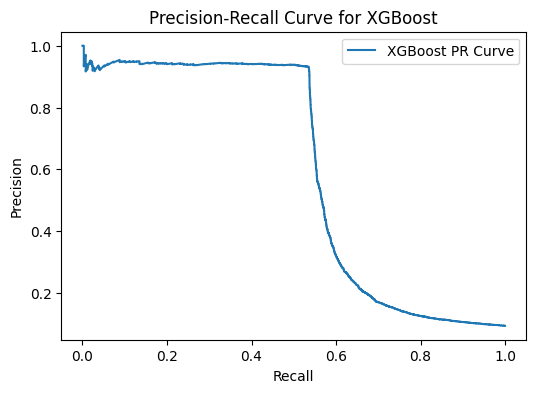

{'auc_pr': np.float64(0.5967091194876947),
 'f1': 0.6698986337593653,
 'confusion_matrix': array([[40807,   282],
        [ 1965,  2280]])}

In [7]:
xgb_fd = XGBoostModel()
xgb_fd.train(X_train_fd, y_train_fd)
Evaluator.evaluate(xgb_fd, X_test_fd, y_test_fd)

# --- RandomForestModel fraud dataset ---


--- Evaluation: Random Forest ---
AUC-PR: 0.6208
F1 Score: 0.6951
Confusion Matrix:
[[41086     3]
 [ 1982  2263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.70      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



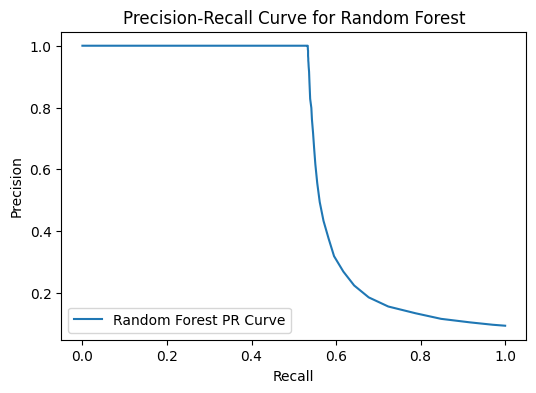

{'auc_pr': np.float64(0.6207772145905367),
 'f1': 0.6951313162340654,
 'confusion_matrix': array([[41086,     3],
        [ 1982,  2263]])}

In [8]:
rf_fd = RandomForestModel()
rf_fd.train(X_train_fd, y_train_fd)
Evaluator.evaluate(rf_fd, X_test_fd, y_test_fd)

## ***  Count the number of instances of each class  **


In [9]:
neg = np.sum(y_train_fd == 0)  # majority class (non-fraud)
pos = np.sum(y_train_fd == 1)  # minority class (fraud)

print(f"Non-fraud: {neg}, Fraud: {pos}")


Non-fraud: 95872, Fraud: 9906


# ***  scale_pos_weight  ***

In [10]:
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")


scale_pos_weight: 9.68
